# Downloading Overlays

This notebook shows how to download an overlay.  
## 1. Instantiating an overlay
To instantiate an overlay, the corresponding bitstream file can be located in the Pynq python package: /pynq/bitstream/ or at any location accessable in the file system.
 
In the first case, only the bitstream name is needed to instantiate the overlay, as shown below.

In [1]:
from pynq import Overlay
ol = Overlay("base.bit")

In the second case, you need to use the absolute file path to instantiate the overlay.

In [2]:
from pynq import Overlay
ol = Overlay("/home/xilinx/pynq/bitstream/base.bit")

To check the timestamp of the overlay:

In [3]:
ol.download()
ol.bitstream.timestamp

'2016/8/15 13:28:37 +5921'

## 2. Checking the PL
There can be multiple overlay instances, but only one overlay can be loaded in programmable logic (PL) at any given time. 

** The PL instance can be queried to discover which overlay is currently active in the FPGA. **

To check the overlay status:

In [4]:
from pynq import PL
PL.bitfile_name

'/home/xilinx/pynq/bitstream/base.bit'

In [5]:
PL.timestamp

'2016/8/15 13:28:37 +5921'

You can also verify if an overlay has been loaded. The following method checks both the `bitfile_name` and `timestamp` before returning the result.

In [6]:
ol.is_loaded()

True

## 3. Overlay downloading overhead

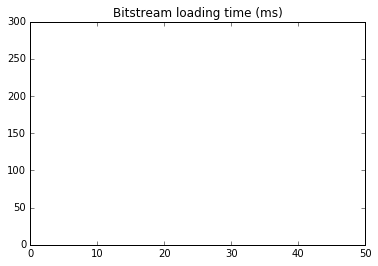

In [7]:
import time
import matplotlib.pyplot as plt
from pynq import Overlay

ol1 = Overlay("base.bit")
ol2 = Overlay("base.bit")
length = 50
log1 = []
log2 = []
for i in range(length):
    start = time.time()
    ol1.download()
    end = time.time()
    # Record milliseconds
    log1.append((end-start)*1000)
    
for i in range(length):
    start = time.time()
    ol2.download()
    end = time.time()
    # Record milliseconds
    log2.append((end-start)*1000)

# Draw the figure
%matplotlib inline
plt.plot(range(length), log1, 'ro')
plt.plot(range(length), log2, 'bx')
plt.title('Bitstream loading time (ms)')
plt.axis([0, length, 0, 300])
plt.show()

ol1.download()
del ol1,ol2